In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
ips_1 = pd.read_csv("ips.csv")
ips_2 = pd.read_csv("fr-en-ips_lycees.csv", delimiter = ';')
statut_social = pd.read_csv("base-cc-emploi-pop-active-2020_v2.csv", delimiter = ";", low_memory = False)

In [4]:
ips = pd.concat([ips_1, ips_2], ignore_index=True)
ips

,rentree_scolaire,academie,code_du_departement,departement,uai,nom_de_l_etablissment,code_insee_de_la_commune,nom_de_la_commune,secteur,type_de_lycee,effectifs_voie_gt,effectifs_voie_pro,effectifs_ensemble_gt_pro,ips_voie_gt,ips_voie_pro,ips_ensemble_gt_pro,ecart_type_de_l_ips_voie_gt,ecart_type_de_l_ips_voie_pro
0,2022-2023,LYON,1.0,AIN,0010001W,LYCEE PROFESSIONNEL ALEXANDRE BERARD LYCEE DES...,1004.0,AMBERIEU EN BUGEY,public,LP,NaN,583.0,583.0,NaN,91.5,91.5,NaN,27.2
1,2022-2023,LYON,1.0,AIN,0010006B,LYCEE POLYVALENT SAINT EXUPERY LYCEE DES METIE...,1033.0,VALSERHONE,public,LPO,556.0,334.0,890.0,99.2,84.2,93.6,33.3,24.8
2,2022-2023,LYON,1.0,AIN,0010013J,LYCEE GENERAL LALANDE,1053.0,BOURG EN BRESSE,public,LEGT,1028.0,NaN,1028.0,123.0,NaN,123.0,34.7,NaN
3,2022-2023,LYON,1.0,AIN,0010016M,LYCEE POLYVALENT JOSEPH MARIE CARRIAT,1053.0,BOURG EN BRESSE,public,LPO,1362.0,335.0,1697.0,111.7,98.8,109.2,32.9,30.2
4,2022-2023,LYON,1.0,AIN,0010069V,LYCEE GENERAL ET TECHNOLOGIQUE PRIVE ENSEMBLE ...,1034.0,BELLEY,privé sous contrat,LEGT,250.0,NaN,250.0,115.8,NaN,115.8,27.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25372,2018-2019,ROUEN,76.0,SEINE MARITIME,0762953X,LYCEE GENERAL ET TECHNOLOGIQUE DE LA COTE D AL...,76655.0,SAINT VALERY EN CAUX,public,LEGT,NaN,NaN,NaN,108.0,NaN,108.0,NaN,NaN
25373,2018-2019,ROUEN,76.0,SEINE MARITIME,0763112V,LYCEE GENERAL PRIVE LA PROVIDENCE,76259.0,FECAMP,privé sous contrat,LEGT,NaN,NaN,NaN,113.7,NaN,113.7,NaN,NaN
25374,2018-2019,CRETEIL,77.0,SEINE-ET-MARNE,0770918E,LYCEE POLYVALENT URUGUAY FRANCE LYCEE DES METI...,77014.0,AVON,public,LPO,NaN,NaN,NaN,113.2,87.1,103.7,NaN,NaN
25375,2018-2019,CRETEIL,77.0,SEINE-ET-MARNE,0770927P,LYCEE GENERAL INTERNATIONAL FRANCOIS 1ER,77186.0,FONTAINEBLEAU,public,LEGT,NaN,NaN,NaN,138.8,NaN,138.8,NaN,NaN


In [5]:
ips = ips.drop(['rentree_scolaire', 'academie', 'code_du_departement', 'uai', 'nom_de_l_etablissment',
                   'nom_de_la_commune', 'ecart_type_de_l_ips_voie_gt', 'ecart_type_de_l_ips_voie_pro', 'type_de_lycee'], axis = 1)

In [6]:
statut_social

,CODGEO,P20_POP1564,P20_POP1524,P20_POP2554,P20_POP5564,P20_H1564,P20_H1524,P20_H2554,P20_H5564,P20_F1564,...,C09_AGRILT_NSAL,C09_INDUSLT_NSAL,C09_CONSTLT_NSAL,C09_CTSLT_NSAL,C09_APESASLT_NSAL,C09_AGRILT_FNSAL,C09_INDUSLT_FNSAL,C09_CONSTLT_FNSAL,C09_CTSLT_FNSAL,C09_APESASLT_FNSAL
0,01001,492.625378,62.576615,308.977537,121.071227,245.898463,30.512424,154.347023,61.039016,246.726915,...,16.143590,0.000000,0.000000,0.000000,0.000000,8.071795,0.000000,0.000000,0.000000,0.000000
1,01002,160.745896,25.911300,111.492801,23.341795,85.712195,17.715486,57.019690,10.977019,75.033700,...,8.057554,0.000000,0.000000,0.000000,0.000000,4.028777,0.000000,0.000000,0.000000,0.000000
2,01004,9053.663982,1867.398835,5500.432097,1685.833049,4500.210134,936.620104,2780.818962,782.771068,4553.453848,...,4.000000,43.677890,56.893815,297.266902,131.382138,0.000000,1.040872,3.885714,112.031987,78.773990
3,01005,1141.000000,162.000000,738.000000,241.000000,568.000000,80.000000,364.000000,124.000000,573.000000,...,0.000000,12.065216,15.319801,43.604179,4.076923,0.000000,4.062311,0.000000,19.807563,4.076923
4,01006,71.368421,7.929825,39.649123,23.789474,41.631579,4.956140,22.798246,13.877193,29.736842,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34968,97420,16083.136764,3475.738237,9632.717687,2974.680839,7663.166465,1808.510903,4404.449697,1450.205865,8419.970299,...,167.989714,49.091255,94.122891,233.507795,72.785876,7.482278,12.552698,0.000000,80.249786,32.599436
34969,97421,4680.849462,931.446465,2853.222756,896.180242,2405.950978,492.177804,1439.003099,474.770074,2274.898484,...,166.030837,29.012122,37.029206,90.047813,35.486764,26.508534,6.506061,0.000000,38.507708,18.491278
34970,97422,52171.705963,11268.190812,30843.650104,10059.865047,24911.578503,5779.388907,14337.889634,4794.299962,27260.127460,...,887.518262,169.339122,424.835307,1037.547884,407.947760,194.122974,29.921794,39.834517,354.741633,151.198742
34971,97423,4615.000000,866.000000,2819.000000,930.000000,2301.000000,443.000000,1368.000000,490.000000,2314.000000,...,64.489426,14.378199,18.384393,72.438261,51.223651,11.895418,3.965139,0.000000,16.926311,18.917014


On cherche les valeurs pertinentes à conserver dans ips :

In [7]:
ips_corr = ips.drop(['departement', 'code_insee_de_la_commune'], axis = 1)
# On retire les variables géographiques pour faciliter la lecture
ips_corr

,secteur,effectifs_voie_gt,effectifs_voie_pro,effectifs_ensemble_gt_pro,ips_voie_gt,ips_voie_pro,ips_ensemble_gt_pro
0,public,NaN,583.0,583.0,NaN,91.5,91.5
1,public,556.0,334.0,890.0,99.2,84.2,93.6
2,public,1028.0,NaN,1028.0,123.0,NaN,123.0
3,public,1362.0,335.0,1697.0,111.7,98.8,109.2
4,privé sous contrat,250.0,NaN,250.0,115.8,NaN,115.8
...,...,...,...,...,...,...,...
25372,public,NaN,NaN,NaN,108.0,NaN,108.0
25373,privé sous contrat,NaN,NaN,NaN,113.7,NaN,113.7
25374,public,NaN,NaN,NaN,113.2,87.1,103.7
25375,public,NaN,NaN,NaN,138.8,NaN,138.8


In [8]:
ips_corr_gen = ips_corr.dropna(subset = ['effectifs_voie_gt'])
ips_corr_gen

,secteur,effectifs_voie_gt,effectifs_voie_pro,effectifs_ensemble_gt_pro,ips_voie_gt,ips_voie_pro,ips_ensemble_gt_pro
1,public,556.0,334.0,890.0,99.2,84.2,93.6
2,public,1028.0,NaN,1028.0,123.0,NaN,123.0
3,public,1362.0,335.0,1697.0,111.7,98.8,109.2
4,privé sous contrat,250.0,NaN,250.0,115.8,NaN,115.8
6,privé sous contrat,383.0,180.0,563.0,136.7,102.9,125.9
...,...,...,...,...,...,...,...
3594,privé sous contrat,325.0,NaN,325.0,130.1,NaN,130.1
3596,public,370.0,NaN,370.0,118.0,NaN,118.0
3597,public,353.0,NaN,353.0,114.5,NaN,114.5
3598,public,764.0,NaN,764.0,112.3,NaN,112.3


In [9]:
ips_corr_gen['secteur'].value_counts()

public                1401
privé sous contrat    1107
Name: secteur, dtype: int64

In [10]:
dummy_df = pd.get_dummies(ips_corr_gen['secteur'])
ips_corr_gen = pd.concat([ips_corr_gen, dummy_df['public']], axis=1)

In [11]:
ips_corr_gen

,secteur,effectifs_voie_gt,effectifs_voie_pro,effectifs_ensemble_gt_pro,ips_voie_gt,ips_voie_pro,ips_ensemble_gt_pro,public
1,public,556.0,334.0,890.0,99.2,84.2,93.6,1
2,public,1028.0,NaN,1028.0,123.0,NaN,123.0,1
3,public,1362.0,335.0,1697.0,111.7,98.8,109.2,1
4,privé sous contrat,250.0,NaN,250.0,115.8,NaN,115.8,0
6,privé sous contrat,383.0,180.0,563.0,136.7,102.9,125.9,0
...,...,...,...,...,...,...,...,...
3594,privé sous contrat,325.0,NaN,325.0,130.1,NaN,130.1,0
3596,public,370.0,NaN,370.0,118.0,NaN,118.0,1
3597,public,353.0,NaN,353.0,114.5,NaN,114.5,1
3598,public,764.0,NaN,764.0,112.3,NaN,112.3,1


<Axes: >

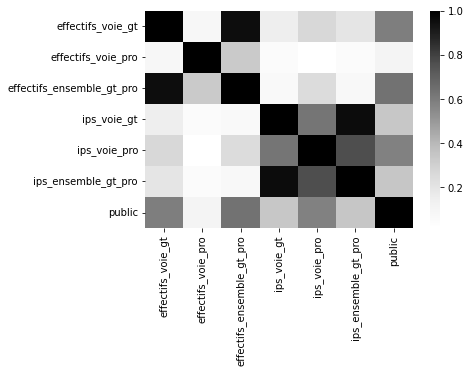

In [12]:
sns.heatmap(abs(ips_corr_gen.drop(['secteur'], axis = 1).corr()), cmap='Greys') 

On va chercher à obtenir ips_ensemble_gt_pro au niveau de la commune, et on déduira les deux autres ips différenciés à partir de cela.

In [13]:
statut_social

,CODGEO,P20_POP1564,P20_POP1524,P20_POP2554,P20_POP5564,P20_H1564,P20_H1524,P20_H2554,P20_H5564,P20_F1564,...,C09_AGRILT_NSAL,C09_INDUSLT_NSAL,C09_CONSTLT_NSAL,C09_CTSLT_NSAL,C09_APESASLT_NSAL,C09_AGRILT_FNSAL,C09_INDUSLT_FNSAL,C09_CONSTLT_FNSAL,C09_CTSLT_FNSAL,C09_APESASLT_FNSAL
0,01001,492.625378,62.576615,308.977537,121.071227,245.898463,30.512424,154.347023,61.039016,246.726915,...,16.143590,0.000000,0.000000,0.000000,0.000000,8.071795,0.000000,0.000000,0.000000,0.000000
1,01002,160.745896,25.911300,111.492801,23.341795,85.712195,17.715486,57.019690,10.977019,75.033700,...,8.057554,0.000000,0.000000,0.000000,0.000000,4.028777,0.000000,0.000000,0.000000,0.000000
2,01004,9053.663982,1867.398835,5500.432097,1685.833049,4500.210134,936.620104,2780.818962,782.771068,4553.453848,...,4.000000,43.677890,56.893815,297.266902,131.382138,0.000000,1.040872,3.885714,112.031987,78.773990
3,01005,1141.000000,162.000000,738.000000,241.000000,568.000000,80.000000,364.000000,124.000000,573.000000,...,0.000000,12.065216,15.319801,43.604179,4.076923,0.000000,4.062311,0.000000,19.807563,4.076923
4,01006,71.368421,7.929825,39.649123,23.789474,41.631579,4.956140,22.798246,13.877193,29.736842,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34968,97420,16083.136764,3475.738237,9632.717687,2974.680839,7663.166465,1808.510903,4404.449697,1450.205865,8419.970299,...,167.989714,49.091255,94.122891,233.507795,72.785876,7.482278,12.552698,0.000000,80.249786,32.599436
34969,97421,4680.849462,931.446465,2853.222756,896.180242,2405.950978,492.177804,1439.003099,474.770074,2274.898484,...,166.030837,29.012122,37.029206,90.047813,35.486764,26.508534,6.506061,0.000000,38.507708,18.491278
34970,97422,52171.705963,11268.190812,30843.650104,10059.865047,24911.578503,5779.388907,14337.889634,4794.299962,27260.127460,...,887.518262,169.339122,424.835307,1037.547884,407.947760,194.122974,29.921794,39.834517,354.741633,151.198742
34971,97423,4615.000000,866.000000,2819.000000,930.000000,2301.000000,443.000000,1368.000000,490.000000,2314.000000,...,64.489426,14.378199,18.384393,72.438261,51.223651,11.895418,3.965139,0.000000,16.926311,18.917014


In [14]:
columns = statut_social.columns
columns

Index(['CODGEO', 'P20_POP1564', 'P20_POP1524', 'P20_POP2554', 'P20_POP5564',
       'P20_H1564', 'P20_H1524', 'P20_H2554', 'P20_H5564', 'P20_F1564',
       ...
       'C09_AGRILT_NSAL', 'C09_INDUSLT_NSAL', 'C09_CONSTLT_NSAL',
       'C09_CTSLT_NSAL', 'C09_APESASLT_NSAL', 'C09_AGRILT_FNSAL',
       'C09_INDUSLT_FNSAL', 'C09_CONSTLT_FNSAL', 'C09_CTSLT_FNSAL',
       'C09_APESASLT_FNSAL'],
      dtype='object', length=354)

In [15]:
# On sélectionne les données de 2020 comme variables explicatives :
columns_20 = [col for col in columns if '20' in col]
columns_20.append('CODGEO')
stat_20 = statut_social[columns_20]
stat_20

,P20_POP1564,P20_POP1524,P20_POP2554,P20_POP5564,P20_H1564,P20_H1524,P20_H2554,P20_H5564,P20_F1564,P20_F1524,...,C20_APESASLT_FNSAL,P20_HCHOM1564,P20_HCHOM1524,P20_HCHOM2554,P20_HCHOM5564,P20_FCHOM1564,P20_FCHOM1524,P20_FCHOM2554,P20_FCHOM5564,CODGEO
0,492.625378,62.576615,308.977537,121.071227,245.898463,30.512424,154.347023,61.039016,246.726915,32.064191,...,0.000000,10.391349,2.849387,6.620216,0.921745,15.972548,0.938454,11.313392,3.720703,01001
1,160.745896,25.911300,111.492801,23.341795,85.712195,17.715486,57.019690,10.977019,75.033700,8.195814,...,0.000000,1.308593,0.000000,0.000000,1.308593,1.018681,0.000000,1.018681,0.000000,01002
2,9053.663982,1867.398835,5500.432097,1685.833049,4500.210134,936.620104,2780.818962,782.771068,4553.453848,930.778731,...,109.948065,373.824898,121.508722,218.424498,33.891679,559.817586,125.771407,390.415933,43.630245,01004
3,1141.000000,162.000000,738.000000,241.000000,568.000000,80.000000,364.000000,124.000000,573.000000,82.000000,...,19.745883,21.000000,6.000000,14.000000,1.000000,37.000000,1.000000,26.000000,10.000000,01005
4,71.368421,7.929825,39.649123,23.789474,41.631579,4.956140,22.798246,13.877193,29.736842,2.973684,...,0.000000,2.973684,0.991228,1.982456,0.000000,1.982456,0.000000,0.991228,0.991228,01006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34968,16083.136764,3475.738237,9632.717687,2974.680839,7663.166465,1808.510903,4404.449697,1450.205865,8419.970299,1667.227334,...,60.065033,1597.139851,429.226618,949.406619,218.506614,1903.465332,344.930442,1386.020518,172.514372,97420
34969,4680.849462,931.446465,2853.222756,896.180242,2405.950978,492.177804,1439.003099,474.770074,2274.898484,439.268660,...,15.495426,654.302750,125.876169,429.233961,99.192620,603.132562,96.023252,424.293609,82.815701,97421
34970,52171.705963,11268.190812,30843.650104,10059.865047,24911.578503,5779.388907,14337.889634,4794.299962,27260.127460,5488.801905,...,344.979225,5716.192596,1154.631707,3761.598205,799.962684,6788.705862,1080.915844,4846.949154,860.840864,97422
34971,4615.000000,866.000000,2819.000000,930.000000,2301.000000,443.000000,1368.000000,490.000000,2314.000000,423.000000,...,26.611520,597.000000,113.000000,388.000000,96.000000,622.000000,99.000000,438.000000,85.000000,97423


In [16]:
ips

,departement,code_insee_de_la_commune,secteur,effectifs_voie_gt,effectifs_voie_pro,effectifs_ensemble_gt_pro,ips_voie_gt,ips_voie_pro,ips_ensemble_gt_pro
0,AIN,1004.0,public,NaN,583.0,583.0,NaN,91.5,91.5
1,AIN,1033.0,public,556.0,334.0,890.0,99.2,84.2,93.6
2,AIN,1053.0,public,1028.0,NaN,1028.0,123.0,NaN,123.0
3,AIN,1053.0,public,1362.0,335.0,1697.0,111.7,98.8,109.2
4,AIN,1034.0,privé sous contrat,250.0,NaN,250.0,115.8,NaN,115.8
...,...,...,...,...,...,...,...,...,...
25372,SEINE MARITIME,76655.0,public,NaN,NaN,NaN,108.0,NaN,108.0
25373,SEINE MARITIME,76259.0,privé sous contrat,NaN,NaN,NaN,113.7,NaN,113.7
25374,SEINE-ET-MARNE,77014.0,public,NaN,NaN,NaN,113.2,87.1,103.7
25375,SEINE-ET-MARNE,77186.0,public,NaN,NaN,NaN,138.8,NaN,138.8


In [17]:
df_y = pd.DataFrame(ips.groupby(['code_insee_de_la_commune']).mean()['ips_ensemble_gt_pro'])
df_y.index = df_y.index.astype(int)
df_y

,ips_ensemble_gt_pro
code_insee_de_la_commune,
1004,102.492308
1031,101.716667
1033,95.600000
1034,98.991892
1049,122.750000
...,...
97611,66.250000
97614,65.933333
97615,79.133333


In [18]:
stat_20 = stat_20.drop(stat_20[(stat_20['CODGEO'].str.contains("2A")) | (stat_20['CODGEO'].str.contains("2B"))].index)
stat_20

,P20_POP1564,P20_POP1524,P20_POP2554,P20_POP5564,P20_H1564,P20_H1524,P20_H2554,P20_H5564,P20_F1564,P20_F1524,...,C20_APESASLT_FNSAL,P20_HCHOM1564,P20_HCHOM1524,P20_HCHOM2554,P20_HCHOM5564,P20_FCHOM1564,P20_FCHOM1524,P20_FCHOM2554,P20_FCHOM5564,CODGEO
0,492.625378,62.576615,308.977537,121.071227,245.898463,30.512424,154.347023,61.039016,246.726915,32.064191,...,0.000000,10.391349,2.849387,6.620216,0.921745,15.972548,0.938454,11.313392,3.720703,01001
1,160.745896,25.911300,111.492801,23.341795,85.712195,17.715486,57.019690,10.977019,75.033700,8.195814,...,0.000000,1.308593,0.000000,0.000000,1.308593,1.018681,0.000000,1.018681,0.000000,01002
2,9053.663982,1867.398835,5500.432097,1685.833049,4500.210134,936.620104,2780.818962,782.771068,4553.453848,930.778731,...,109.948065,373.824898,121.508722,218.424498,33.891679,559.817586,125.771407,390.415933,43.630245,01004
3,1141.000000,162.000000,738.000000,241.000000,568.000000,80.000000,364.000000,124.000000,573.000000,82.000000,...,19.745883,21.000000,6.000000,14.000000,1.000000,37.000000,1.000000,26.000000,10.000000,01005
4,71.368421,7.929825,39.649123,23.789474,41.631579,4.956140,22.798246,13.877193,29.736842,2.973684,...,0.000000,2.973684,0.991228,1.982456,0.000000,1.982456,0.000000,0.991228,0.991228,01006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34968,16083.136764,3475.738237,9632.717687,2974.680839,7663.166465,1808.510903,4404.449697,1450.205865,8419.970299,1667.227334,...,60.065033,1597.139851,429.226618,949.406619,218.506614,1903.465332,344.930442,1386.020518,172.514372,97420
34969,4680.849462,931.446465,2853.222756,896.180242,2405.950978,492.177804,1439.003099,474.770074,2274.898484,439.268660,...,15.495426,654.302750,125.876169,429.233961,99.192620,603.132562,96.023252,424.293609,82.815701,97421
34970,52171.705963,11268.190812,30843.650104,10059.865047,24911.578503,5779.388907,14337.889634,4794.299962,27260.127460,5488.801905,...,344.979225,5716.192596,1154.631707,3761.598205,799.962684,6788.705862,1080.915844,4846.949154,860.840864,97422
34971,4615.000000,866.000000,2819.000000,930.000000,2301.000000,443.000000,1368.000000,490.000000,2314.000000,423.000000,...,26.611520,597.000000,113.000000,388.000000,96.000000,622.000000,99.000000,438.000000,85.000000,97423


In [19]:
stat_20['CODGEO'] = stat_20['CODGEO'].astype(int)
stat_20.rename(columns={'CODGEO': 'code_insee_de_la_commune'}, inplace=True)
stat_20 = stat_20.set_index("code_insee_de_la_commune")
stat_20

,P20_POP1564,P20_POP1524,P20_POP2554,P20_POP5564,P20_H1564,P20_H1524,P20_H2554,P20_H5564,P20_F1564,P20_F1524,...,C20_CTSLT_FNSAL,C20_APESASLT_FNSAL,P20_HCHOM1564,P20_HCHOM1524,P20_HCHOM2554,P20_HCHOM5564,P20_FCHOM1564,P20_FCHOM1524,P20_FCHOM2554,P20_FCHOM5564
code_insee_de_la_commune,,,,,,,,,,,,,,,,,,,,,
1001,492.625378,62.576615,308.977537,121.071227,245.898463,30.512424,154.347023,61.039016,246.726915,32.064191,...,4.777331,0.000000,10.391349,2.849387,6.620216,0.921745,15.972548,0.938454,11.313392,3.720703
1002,160.745896,25.911300,111.492801,23.341795,85.712195,17.715486,57.019690,10.977019,75.033700,8.195814,...,0.000000,0.000000,1.308593,0.000000,0.000000,1.308593,1.018681,0.000000,1.018681,0.000000
1004,9053.663982,1867.398835,5500.432097,1685.833049,4500.210134,936.620104,2780.818962,782.771068,4553.453848,930.778731,...,130.049944,109.948065,373.824898,121.508722,218.424498,33.891679,559.817586,125.771407,390.415933,43.630245
1005,1141.000000,162.000000,738.000000,241.000000,568.000000,80.000000,364.000000,124.000000,573.000000,82.000000,...,15.000000,19.745883,21.000000,6.000000,14.000000,1.000000,37.000000,1.000000,26.000000,10.000000
1006,71.368421,7.929825,39.649123,23.789474,41.631579,4.956140,22.798246,13.877193,29.736842,2.973684,...,0.000000,0.000000,2.973684,0.991228,1.982456,0.000000,1.982456,0.000000,0.991228,0.991228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97420,16083.136764,3475.738237,9632.717687,2974.680839,7663.166465,1808.510903,4404.449697,1450.205865,8419.970299,1667.227334,...,108.048874,60.065033,1597.139851,429.226618,949.406619,218.506614,1903.465332,344.930442,1386.020518,172.514372
97421,4680.849462,931.446465,2853.222756,896.180242,2405.950978,492.177804,1439.003099,474.770074,2274.898484,439.268660,...,17.417120,15.495426,654.302750,125.876169,429.233961,99.192620,603.132562,96.023252,424.293609,82.815701
97422,52171.705963,11268.190812,30843.650104,10059.865047,24911.578503,5779.388907,14337.889634,4794.299962,27260.127460,5488.801905,...,505.653332,344.979225,5716.192596,1154.631707,3761.598205,799.962684,6788.705862,1080.915844,4846.949154,860.840864


In [20]:
df_model = df_y.merge(stat_20, left_index = True, right_index = True)
df_model

,ips_ensemble_gt_pro,P20_POP1564,P20_POP1524,P20_POP2554,P20_POP5564,P20_H1564,P20_H1524,P20_H2554,P20_H5564,P20_F1564,...,C20_CTSLT_FNSAL,C20_APESASLT_FNSAL,P20_HCHOM1564,P20_HCHOM1524,P20_HCHOM2554,P20_HCHOM5564,P20_FCHOM1564,P20_FCHOM1524,P20_FCHOM2554,P20_FCHOM5564
code_insee_de_la_commune,,,,,,,,,,,,,,,,,,,,,
1004,102.492308,9053.663982,1867.398835,5500.432097,1685.833049,4500.210134,936.620104,2780.818962,782.771068,4553.453848,...,130.049944,109.948065,373.824898,121.508722,218.424498,33.891679,559.817586,125.771407,390.415933,43.630245
1031,101.716667,2307.431089,435.484668,1423.715309,448.231112,1136.574722,213.931784,730.163671,192.479267,1170.856366,...,31.034041,7.619700,101.316742,19.266878,73.949714,8.100151,148.995377,24.240719,104.605706,20.148952
1033,95.600000,10475.193975,1803.990225,6799.546690,1871.657061,5279.175771,962.755486,3441.146607,875.273678,5196.018204,...,101.074673,64.961572,619.799899,133.559180,410.868198,75.372521,616.789836,93.556120,462.969526,60.264190
1034,98.991892,5268.304701,1016.759134,3068.302817,1183.242750,2622.499440,548.464121,1527.122009,546.913310,2645.805262,...,146.565395,35.311747,243.419975,59.939526,151.975209,31.505240,222.242115,39.209388,150.534826,32.497900
1049,122.750000,2089.000000,358.000000,1291.000000,440.000000,1043.000000,196.000000,636.000000,211.000000,1046.000000,...,26.037752,36.482205,63.000000,19.000000,32.000000,12.000000,72.000000,7.000000,51.000000,14.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97416,89.470833,55437.904960,11604.840583,33783.700797,10049.363580,26260.425560,5812.502116,15722.159587,4725.763857,29177.479401,...,900.138705,639.368542,5573.849495,1052.509314,3749.984800,771.355381,6859.463243,1051.131104,4974.839931,833.492209
97418,79.058333,22901.630689,4518.477135,14158.243972,4224.909582,10984.247035,2248.169444,6683.940451,2052.137140,11917.383654,...,203.227926,97.886422,2093.197889,496.404074,1348.079333,248.714481,2181.137071,357.668985,1626.651806,196.816281
97420,75.133333,16083.136764,3475.738237,9632.717687,2974.680839,7663.166465,1808.510903,4404.449697,1450.205865,8419.970299,...,108.048874,60.065033,1597.139851,429.226618,949.406619,218.506614,1903.465332,344.930442,1386.020518,172.514372


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm

On teste les modèles SVM :

In [22]:
y = df_model['ips_ensemble_gt_pro'].round()
X = df_model.drop(['ips_ensemble_gt_pro'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

scaler = StandardScaler()

# Adapter le scaler aux données d'entraînement et le transformer
X_train_scaled = scaler.fit_transform(X_train)

# Appliquer la même transformation aux données de test
X_test_scaled = scaler.transform(X_test)

regr = svm.SVR()
regr.fit(X_train_scaled, y_train)

# Évaluer le modèle
accuracy = regr.score(X_test_scaled, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.11630901104057711


In [23]:
import matplotlib.pyplot as plt

C:\Users\ryaut\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


(array([ 1.,  0.,  0.,  0.,  2.,  1.,  5.,  4.,  3.,  5.,  9.,  5., 11.,
        12., 11., 10., 12., 20., 14., 22., 20., 32., 14., 23., 22., 22.,
        22.,  7., 14., 12., 11., 10.,  9.,  3., 12.,  3.,  3.,  7.,  2.,
         5.,  5.,  4.,  4.,  0.,  1.,  0.,  3.,  0.,  0.,  1.]),
 array([ 61.  ,  62.82,  64.64,  66.46,  68.28,  70.1 ,  71.92,  73.74,
         75.56,  77.38,  79.2 ,  81.02,  82.84,  84.66,  86.48,  88.3 ,
         90.12,  91.94,  93.76,  95.58,  97.4 ,  99.22, 101.04, 102.86,
        104.68, 106.5 , 108.32, 110.14, 111.96, 113.78, 115.6 , 117.42,
        119.24, 121.06, 122.88, 124.7 , 126.52, 128.34, 130.16, 131.98,
        133.8 , 135.62, 137.44, 139.26, 141.08, 142.9 , 144.72, 146.54,
        148.36, 150.18, 152.  ]),
 <BarContainer object of 50 artists>)

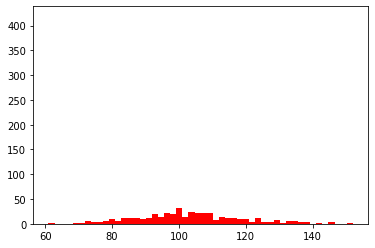

In [24]:
plt.hist(regr.predict(X_test))
plt.hist(y_test, bins = 50, color = 'r')

On coupe en intervalles pour obtenir de meilleurs résultats :

In [25]:
test = df_model
# Définir les intervalles pour diviser les valeurs en catégories
intervalles = [ips for ips in range(38, 179, 6)]  # Les valeurs définissent les limites des intervalles

# Définir les étiquettes pour chaque intervalle
labels = [(intervalles[i]+intervalles[i+1])/2 for i in range(len(intervalles)-1)]

# Diviser les valeurs en intervalles en utilisant la fonction cut()
test['Groupes'] = pd.cut(test['ips_ensemble_gt_pro'], bins=intervalles, labels=labels)

# Afficher le DataFrame avec les valeurs divisées en intervalles
display(test)

,ips_ensemble_gt_pro,P20_POP1564,P20_POP1524,P20_POP2554,P20_POP5564,P20_H1564,P20_H1524,P20_H2554,P20_H5564,P20_F1564,...,C20_APESASLT_FNSAL,P20_HCHOM1564,P20_HCHOM1524,P20_HCHOM2554,P20_HCHOM5564,P20_FCHOM1564,P20_FCHOM1524,P20_FCHOM2554,P20_FCHOM5564,Groupes
code_insee_de_la_commune,,,,,,,,,,,,,,,,,,,,,
1004,102.492308,9053.663982,1867.398835,5500.432097,1685.833049,4500.210134,936.620104,2780.818962,782.771068,4553.453848,...,109.948065,373.824898,121.508722,218.424498,33.891679,559.817586,125.771407,390.415933,43.630245,101.0
1031,101.716667,2307.431089,435.484668,1423.715309,448.231112,1136.574722,213.931784,730.163671,192.479267,1170.856366,...,7.619700,101.316742,19.266878,73.949714,8.100151,148.995377,24.240719,104.605706,20.148952,101.0
1033,95.600000,10475.193975,1803.990225,6799.546690,1871.657061,5279.175771,962.755486,3441.146607,875.273678,5196.018204,...,64.961572,619.799899,133.559180,410.868198,75.372521,616.789836,93.556120,462.969526,60.264190,95.0
1034,98.991892,5268.304701,1016.759134,3068.302817,1183.242750,2622.499440,548.464121,1527.122009,546.913310,2645.805262,...,35.311747,243.419975,59.939526,151.975209,31.505240,222.242115,39.209388,150.534826,32.497900,101.0
1049,122.750000,2089.000000,358.000000,1291.000000,440.000000,1043.000000,196.000000,636.000000,211.000000,1046.000000,...,36.482205,63.000000,19.000000,32.000000,12.000000,72.000000,7.000000,51.000000,14.000000,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97416,89.470833,55437.904960,11604.840583,33783.700797,10049.363580,26260.425560,5812.502116,15722.159587,4725.763857,29177.479401,...,639.368542,5573.849495,1052.509314,3749.984800,771.355381,6859.463243,1051.131104,4974.839931,833.492209,89.0
97418,79.058333,22901.630689,4518.477135,14158.243972,4224.909582,10984.247035,2248.169444,6683.940451,2052.137140,11917.383654,...,97.886422,2093.197889,496.404074,1348.079333,248.714481,2181.137071,357.668985,1626.651806,196.816281,77.0
97420,75.133333,16083.136764,3475.738237,9632.717687,2974.680839,7663.166465,1808.510903,4404.449697,1450.205865,8419.970299,...,60.065033,1597.139851,429.226618,949.406619,218.506614,1903.465332,344.930442,1386.020518,172.514372,77.0


In [26]:
y = df_model['Groupes']
X = df_model.drop(['ips_ensemble_gt_pro', 'Groupes'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

scaler = StandardScaler()

# Adapter le scaler aux données d'entraînement et le transformer
X_train_scaled = scaler.fit_transform(X_train)

# Appliquer la même transformation aux données de test
X_test_scaled = scaler.transform(X_test)

classifier = svm.SVC()
classifier.fit(X_train_scaled, y_train)

# Évaluer le modèle
accuracy = classifier.score(X_test_scaled, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.20813397129186603


C:\Users\ryaut\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  9.,  0.,  0., 15.,  0.,  0., 32.,
         0.,  0., 37.,  0.,  0., 56.,  0.,  0., 78.,  0.,  0.,  0., 68.,
         0.,  0., 43.,  0.,  0., 27.,  0.,  0., 19.,  0.,  0., 16.,  0.,
         0., 12.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 59.  ,  60.92,  62.84,  64.76,  66.68,  68.6 ,  70.52,  72.44,
         74.36,  76.28,  78.2 ,  80.12,  82.04,  83.96,  85.88,  87.8 ,
         89.72,  91.64,  93.56,  95.48,  97.4 ,  99.32, 101.24, 103.16,
        105.08, 107.  , 108.92, 110.84, 112.76, 114.68, 116.6 , 118.52,
        120.44, 122.36, 124.28, 126.2 , 128.12, 130.04, 131.96, 133.88,
        135.8 , 137.72, 139.64, 141.56, 143.48, 145.4 , 147.32, 149.24,
        151.16, 153.08, 155.  ]),
 <BarContainer object of 50 artists>)

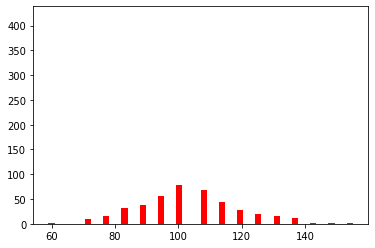

In [31]:
plt.hist(classifier.predict(X_test))
plt.hist(y_test, bins = 50, color = 'r')

In [30]:
classifier.predict(X_test)

C:\Users\ryaut\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 11

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
y = df_model['Groupes']
X = df_model.drop(['ips_ensemble_gt_pro', 'Groupes'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

scaler = StandardScaler()

# Adapter le scaler aux données d'entraînement et le transformer
X_train_scaled = scaler.fit_transform(X_train)

# Appliquer la même transformation aux données de test
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_scaled, y_train)

# Évaluer le modèle
accuracy = clf.score(X_test_scaled, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.19856459330143542


In [40]:
clf.predict(X_test)

C:\Users\ryaut\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 113., 113., 113., 113.,
       113., 113., 113., 113., 113., 113., 113., 11

In [41]:
from sklearn.cluster import KMeans

In [52]:
y = df_model['Groupes']
X = df_model.drop(['ips_ensemble_gt_pro', 'Groupes'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

scaler = StandardScaler()

# Adapter le scaler aux données d'entraînement et le transformer
X_train_scaled = scaler.fit_transform(X_train)

# Appliquer la même transformation aux données de test
X_test_scaled = scaler.transform(X_test)

kmeans = KMeans(n_clusters=10, random_state=0).fit(X_train_scaled)

# Évaluer le modèle
#accuracy = kmeans.score(X_test_scaled, y_test)
#print(f"Accuracy: {accuracy}")

In [67]:
kmeans.predict(X_test_scaled)

AttributeError: 'NoneType' object has no attribute 'split'